# EXPLORATORY DATA ANALYSIS ON A SUPERMARKET SALES

To improve my skills in data analysis, I regularly look for datasets that can help me to get my hands dirty.
This supermarket sales dataset has been found and dow on Kaggle : https://www.kaggle.com/aungpyaeap/supermarket-sales.
        
The growth of supermarkets in most populated cities are increasing and market competitions are also high. This dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. I will use it to get more insights about the customer purchases.

        

Attributes of the dataset

**Invoice id**: Computer generated sales slip invoice identification number

**Branch**: Branch of supercenter (3 branches are available identified by A, B and C).

**City**: Location of supercenters

**Customer type**: Type of customers, recorded by Members for customers using member card and Normal for without member card.

**Gender**: Gender type of customer

**Product line**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

**Unit price**: Price of each product in $

**Quantity**: Number of products purchased by customer

**Tax**: 5% tax fee for customer buying

**Total**: Total price including tax

**Date**: Date of purchase (Record available from January 2019 to March 2019)

**Time**: Purchase time (10am to 9pm)

**Payment**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**COGS**: Cost of goods sold

**Gross margin percentage**: Gross margin percentage

**Gross income**: Gross income

**Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


*Source* : Kaggle



# IMPORTING AND INSTALLING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# GETTING TO KNOW THE DATASET

Here, I use the **parse_dates** parameter to store the date column with datetime data type so that I do not have to convert the date data type later on.

The datetime data type allows using the functions under the dt accessor that are specific to dates and times.

In [2]:
path = "./supermarket_sales.csv"
supermarket_df = pd.read_csv(path, parse_dates=['Date'])

# FIRST AND LAST ENTRIES OF THE DATASET

In [3]:
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
supermarket_df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


# SHAPE OF THE DATASET

In [5]:
shape=supermarket_df.shape
print(f'The dataset contains {shape[0]} entries and {shape[1]} columns')

The dataset contains 1000 entries and 17 columns


# COLUMNS OF THE DATASET

The different columns of the dataset have already been described in the first row of this jupyter notebook file.
Nevertheless, this is how they can be displayed.

In [6]:
supermarket_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
supermarket_df.columns.tolist()

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

# CHECKING IF THERE IS ANY MISSING VALUE IN THE DATASET

In [8]:
supermarket_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

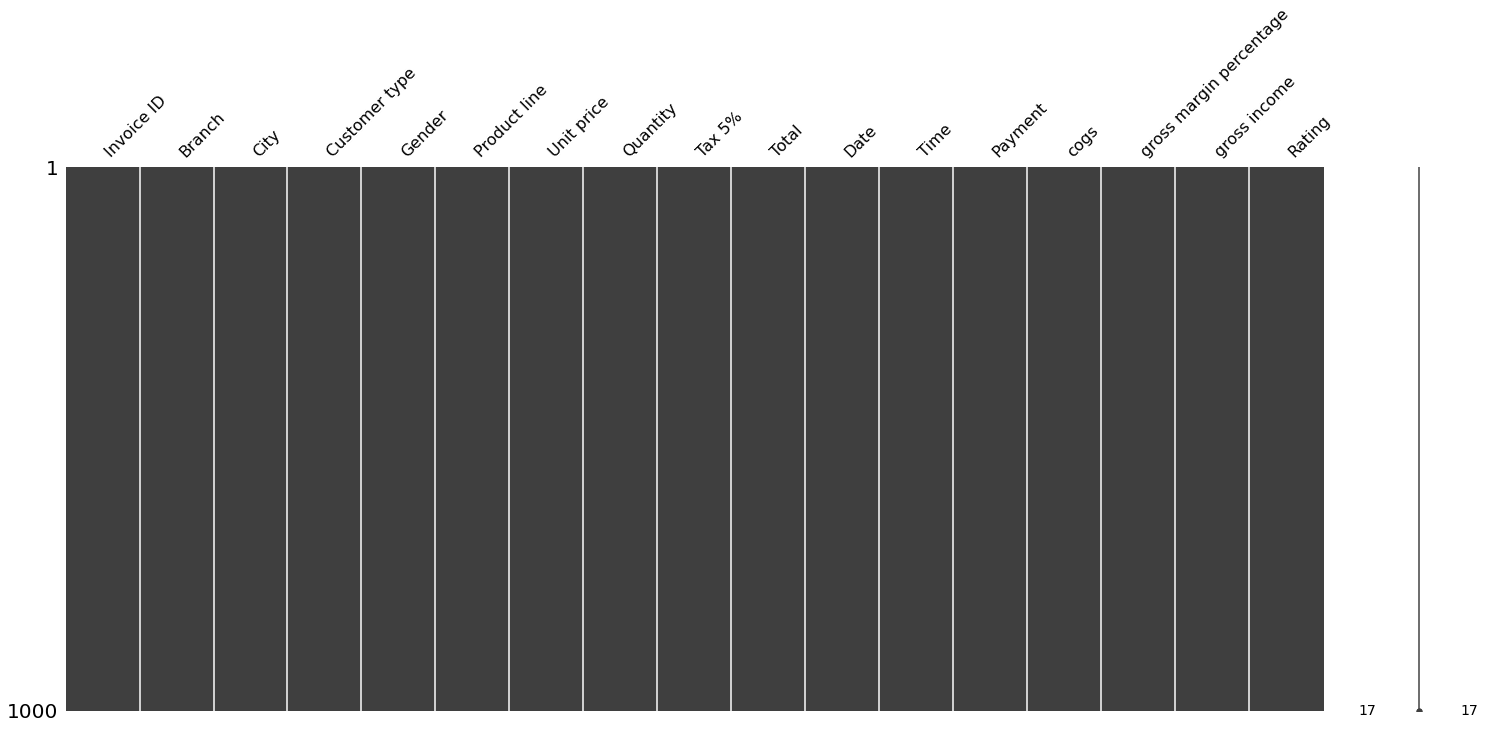

In [9]:
#Visualize the nan values in each columns using the missingno library
msno.matrix(supermarket_df);

# LOOKING AT THE UNIQUE VALUES OF EACH COLUMN 

In [10]:
supermarket_df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [11]:
supermarket_df.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
supermarket_df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [13]:
supermarket_df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

# CHECKING IF SOME DATA ARE DUPLICATED

In [14]:
supermarket_df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

# CLEANING THE DATA

There are some columns which are either redundant and irrelevant to the analysis.

   - Invoice ID: A unique invoice identification number. It does not possess any information for analysis.
   - Cogs: Product of the unit price and quantity columns.
   - Gross margin percentage: Consists of a single (constant) value which is 4.761905.
   - Gross income: Can be obtained from multiplying the total column with 0.04761905 (i.e. gross margin percentage).
   - City: Perfectly correlated with the branch column. There is one branch in each city.

In order to simplify the dataset, these different columns are dropped.

In [15]:
to_drop = ['Invoice ID', 'cogs', 'gross margin percentage', 'gross income']
supermarket_df.drop(to_drop, axis=1, inplace=True)

In [16]:
supermarket_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3


# CHECKING FOR OUTLIERS

<AxesSubplot:>

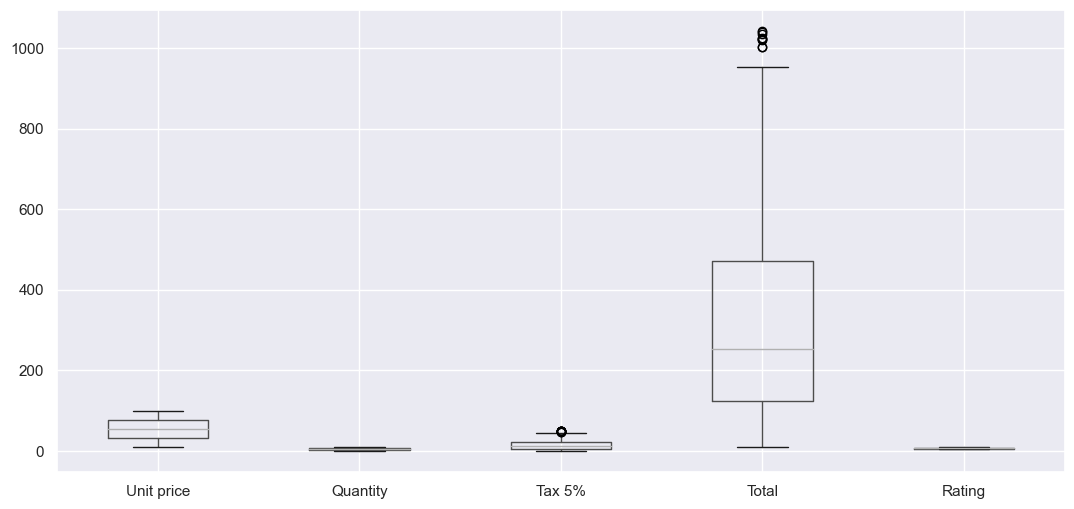

In [44]:
plt.figure(figsize=(13,6))
supermarket_df.boxplot()

# DATA ANALYSIS
I will now get some insights from the dataset and give answers to some questions.

## BRANCHES AND SALES

It might be interested to get a general overview of the sales at each branch.

The total amount of sales and average sales amount can be calculated with the groupby function.

In [18]:
supermarket_df[['Branch', 'Total']].groupby('Branch').agg(['mean','sum','count'])

Total                   
              mean          sum count
Branch                               
A       312.354031  106200.3705   340
B       319.872506  106197.6720   332
C       337.099715  110568.7065   328

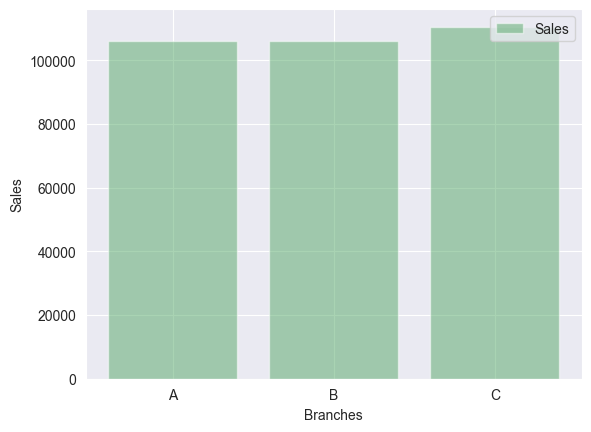

In [31]:
plt.style.use('default')
sns.set_style('darkgrid')
#Paramter for the x-axis
branches = [branch for branch, supermarket_df in supermarket_df.groupby('Branch')]
sale_branch=supermarket_df.groupby('Branch').sum()['Total']
#Plot the graph

plt.bar(branches,sale_branch,alpha=0.5,color='g')
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.legend(['Sales'])
plt.show()

The average amount sales amount is higher in the C branch. On the contrary, the C branch has the minimum number of invoices.


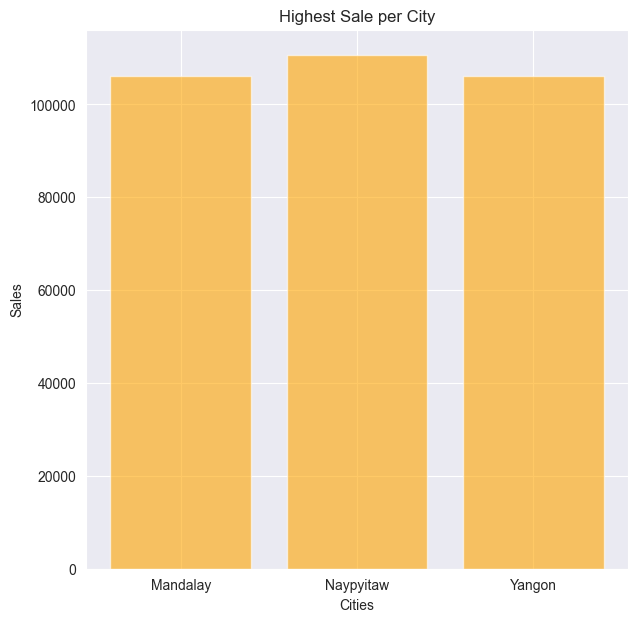

In [20]:
sales=supermarket_df.groupby('City').sum()['Total'] #Y-values
cities=[city for city, supermarket_df in supermarket_df.groupby('City')] #X-values

# Plot
plt.figure(figsize=(7,7))
plt.bar(cities,sales,color='orange',alpha=.6)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per City')
plt.show()

It can be seen that Naypyitaw Cities has the highest number of total sales according to the plot.

## AVERAGE PRICE PER PRODUCT LINE

In [21]:
supermarket_df[['Product line', 'Unit price']].groupby('Product line').mean().sort_values(by='Unit price', ascending=False).round(2)

,Unit price
Product line,
Fashion accessories,57.15
Sports and travel,56.99
Food and beverages,56.01
Home and lifestyle,55.32
Health and beauty,54.85
Electronic accessories,53.55


Through this classification, Fashion accessories is the product line that has the highest average price for its products. Well, products lines like Sports and travel or Food and beverages are not very far from the top one; because they also have their average price a bit less than 57.15.  

## TOTAL SALES PER DATE

In [32]:
dates = supermarket_df[['Date','Total']].groupby('Date').sum()
dates.head(10)

,Total
Date,
2019-01-01,4745.1810
2019-01-02,1945.5030
2019-01-03,2078.1285
2019-01-04,1623.6885
2019-01-05,3536.6835
2019-01-06,3614.2050
2019-01-07,2834.2440
2019-01-08,5293.7325
2019-01-09,3021.3435


This will be used in the next step to plot the evolution of sales per week. The sales amount have seriously decreased in the third week of February. How can this be explained ? 

<AxesSubplot:xlabel='Date'>

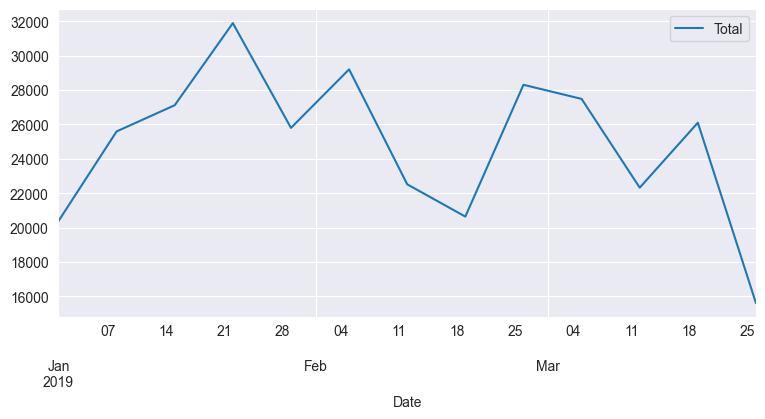

In [23]:
dates.resample('7D').sum().plot(figsize=(9,4))


## WHICH GENDER BUY MORE OF WHICH PRODUCT LINE ?

In [24]:
gender = supermarket_df[['Gender','Product line','Quantity']].groupby(['Gender','Product line'], as_index=False).sum()
gender

,Gender,Product line,Quantity
0,Female,Electronic accessories,488
1,Female,Fashion accessories,530
2,Female,Food and beverages,514
3,Female,Health and beauty,343
4,Female,Home and lifestyle,498
5,Female,Sports and travel,496
6,Male,Electronic accessories,483
7,Male,Fashion accessories,372
8,Male,Food and beverages,438
9,Male,Health and beauty,511


Let's use this dataframe to visualize through a catplot which one of the two genders make the maximum of purchases.

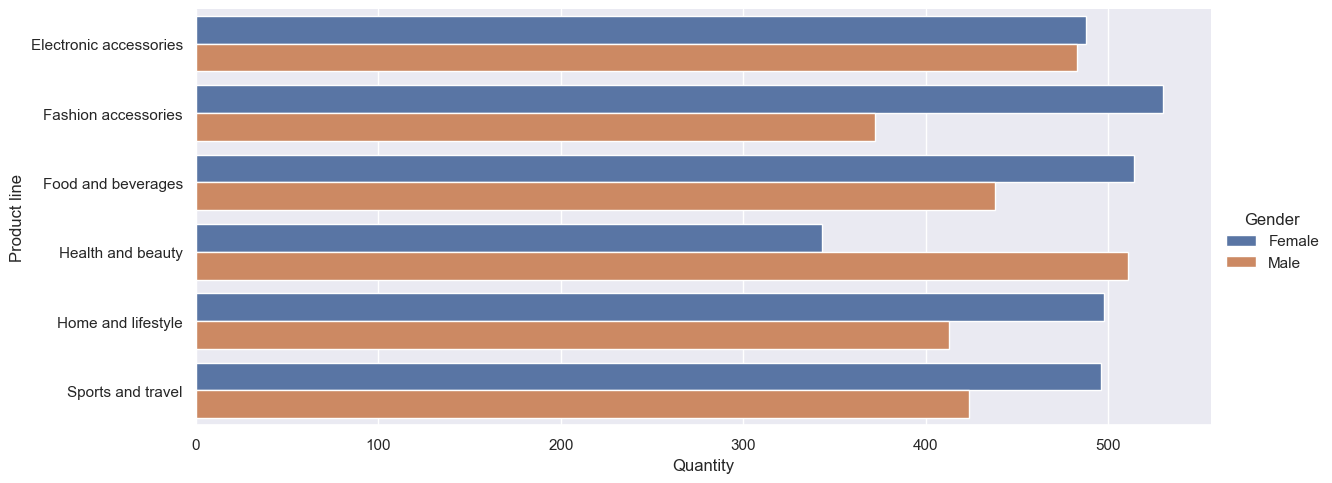

In [36]:
sns.set(style='darkgrid')
sns.catplot(data=gender, y='Product line', x='Quantity', kind='bar', hue='Gender', aspect=2.5, orient='h')

Female purchases exceed male purchases in all the categories except the health and beauty product line. It seems quite weird, for the simple reason that women used to care about their bodies and health more than men do. 
But this is what the data reveal...

## PLOT GENDER PURCHASE PER PRODUCT LINE

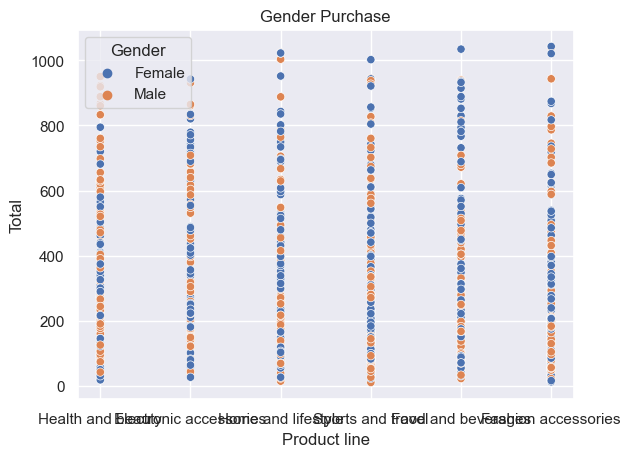

In [26]:
plt.title('Gender Purchase')
sns.scatterplot(x='Product line',y='Total',hue='Gender', data=supermarket_df);

## PRODUCT SALES BY PRODUCT LINE

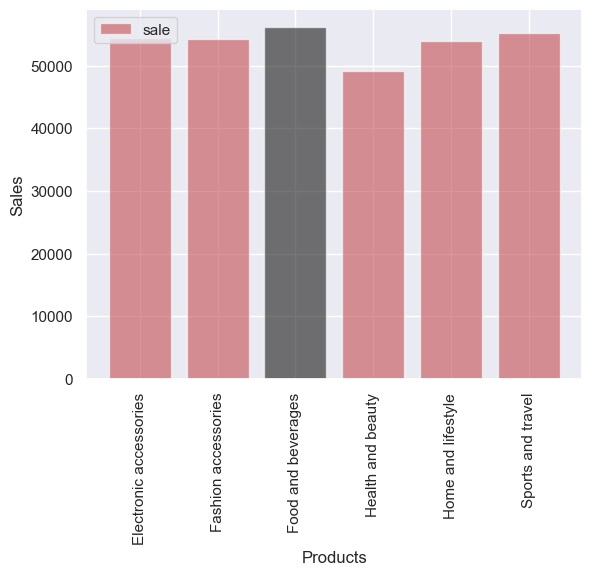

In [27]:
#Parameters
sale_product=supermarket_df.groupby('Product line').sum()['Total']
products =[product for product, supermarket_df in supermarket_df.groupby('Product line')]
c=['r','r','k','r','r','r']
#Plot the graph

plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()


Food and Beverages is the category in which male as well as female make the highest volume of sales. It is a vital need; to eat.

## WHICH BRANCH IS MORE RATED ?

/home/modoukpe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


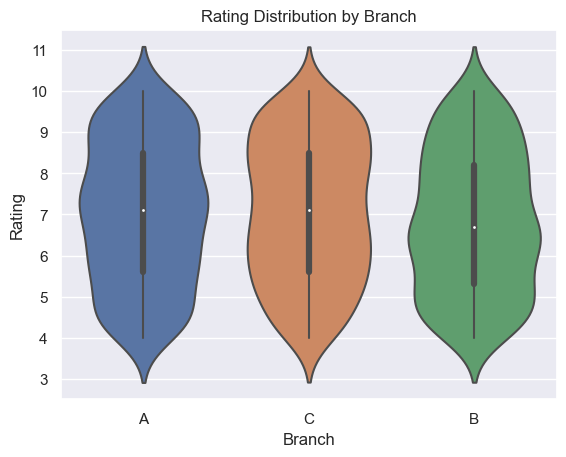

In [28]:
plt.title('Rating Distribution by Branch')
sns.violinplot('Branch','Rating',data=supermarket_df);

Actually, there is no much precision about branches and what they really means. But with this plot, the branch C is the one with the good ratings.

## PAYMENT METHODS

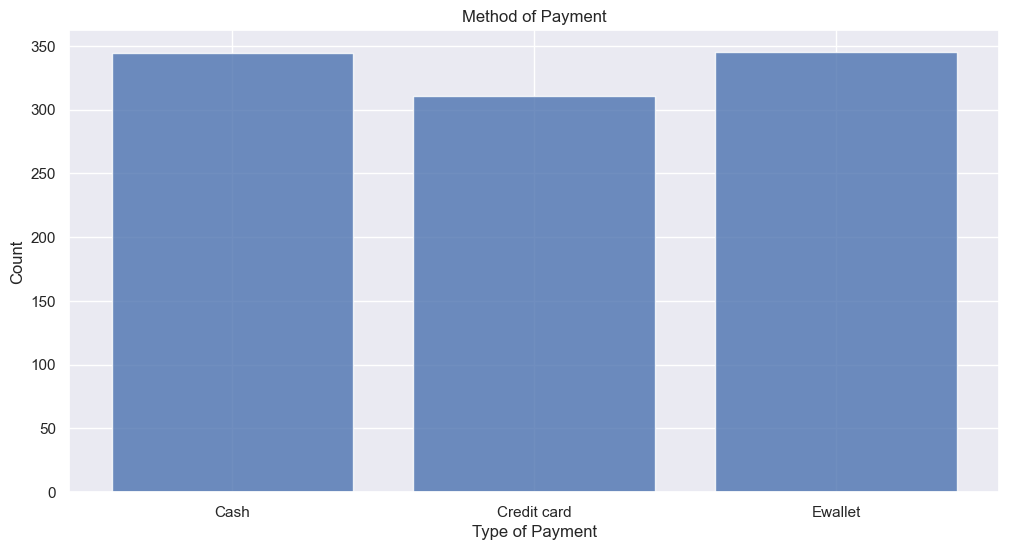

In [29]:
methods=supermarket_df.groupby('Payment').count()['Total']
payment=['Cash','Credit card','Ewallet']

# Plot 
plt.figure(figsize=(12,6))
plt.bar(payment, methods, alpha=0.8)
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.title('Method of Payment')
plt.show()

People prefer to pay in cash when they buy a product in this supermarket. Then comes the Ewallet and finally the Credit card methods.

## CORRELATION MATRIX

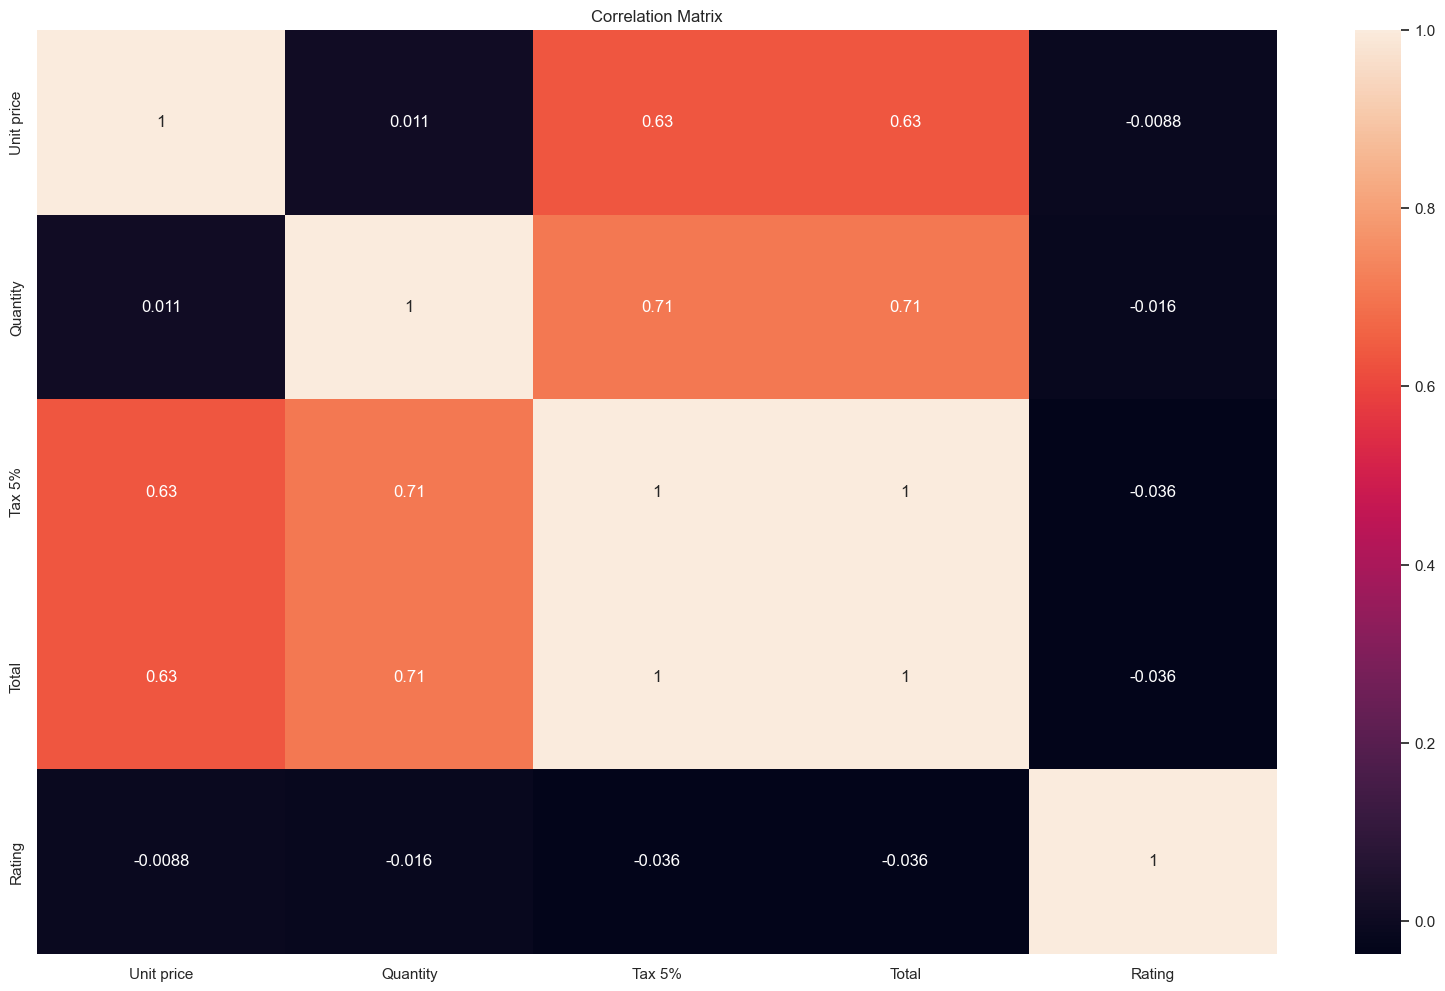

In [30]:
#Create a correlation matrix
corr_df=supermarket_df.corr()

plt.figure(figsize=(20,12))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()

Tax 5% and Total perfectly correlate according to the heatmap. 

Pandas, Matplotlib, seaborn are the main libraris used to process this exploratory data analysis on the supermarket sales dataset. Several insights have been retrieved from the data.